# Factorization VS SVP complexity demo

In [1]:
from sage.modules.free_module_integer import IntegerLattice as Lattice

The standard $n = pq$ modulus, factored with the nubmer field sieve:

In [2]:
@interact
def rsa_instance(msg = input_box(default='42',label="Message:"), bits=slider([48 .. 1024])):
    p = random_prime(2^bits)
    q = random_prime(2^bits)
    n = p*q
    %time factor(n)

CPU times: user 14.9 ms, sys: 9.71 ms, total: 24.6 ms
Wall time: 27.9 ms


Solving the SVP on a crypto-safe lattice with LLL:

In [4]:
@interact
def sis_instance(msg = input_box(default='42',label="Message:"), bits=slider([48 .. 1024])):
    q = 59393
    A = Lattice(random_matrix(GF(q), bits, bits^2),lll_reduce=False)
    %time A.shortest_vector()

CPU times: user 2.51 s, sys: 306 ms, total: 2.82 s
Wall time: 3.06 s


## Expected quantum running time graph

best quantum factoring: https://ieeexplore.ieee.org/document/365700/

best quantum SVP solver: https://arxiv.org/pdf/1709.00378.pdf

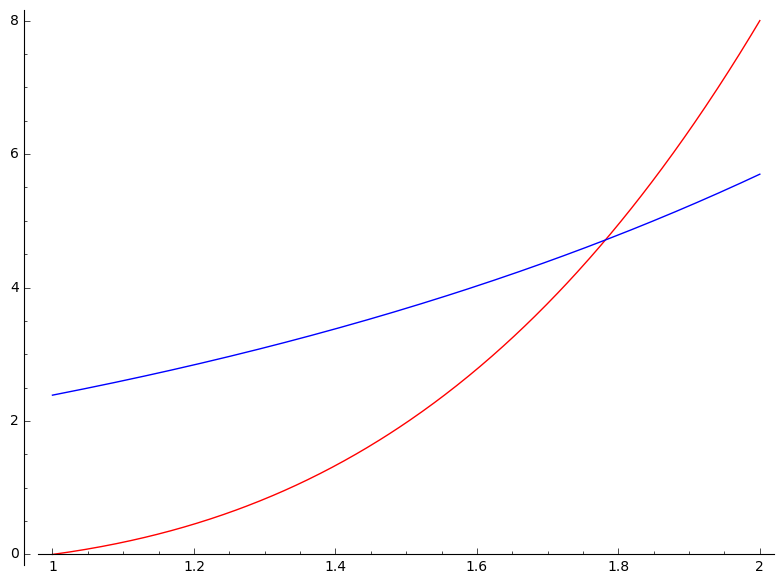

In [4]:
@interact
def iplot(f=slider([1..128], label="from"), t=slider([2..128], label="to")):
    return plot(x^3*log(x,2), (x, f, t), color="red") + plot(2^(1.2553*x), (x, f, t))